In [1]:
import os
import math
from collections import Counter

import re
import pandas as pd


In [5]:
# 定义文档路径
documents_path = r"E:\UM\sem5\CISC3014\project\sentence"

# 存储文档内容的字典
document_contents = {}

# 遍历文档路径，读取文档内容
for filename in os.listdir(documents_path):
    if filename.endswith(".txt"):
        with open(os.path.join(documents_path, filename), "r", encoding="utf-8") as file:
            document_contents[filename] = file.read()

In [6]:
# 提取英文单词并删除特定的"n.", "adj.", "v."
filtered_document_contents = {}
for filename, content in document_contents.items():
    words = re.findall(r'\b[A-Za-z]+\b', content)
    filtered_words = [word.lower() for word in words if word.lower() not in ['n', 'adj', 'v ','adv','vi','vt']]
    filtered_content = ' '.join(filtered_words)
    filtered_document_contents[filename] = filtered_content

# 打印处理后的文档内容
for filename, content in filtered_document_contents.items():
    print(f"--- {filename} ---\n{content}\n{'-'*50}")

--- Academic Research Scenarios - Essay Writing.txt ---
thesis my thesis explores the impact of artificial intelligence on job automation in the modern workforce dissertation the doctoral candidate spent years conducting research for her dissertation on sustainable urban development paper the conference accepted my paper on renewable energy sources for publication book list before starting the research i compiled a comprehensive book list to gather relevant sources checklist creating a checklist helped me stay organized throughout the essay writing process reading list the professor provided a detailed reading list to guide students in their research review the peer review process is essential for ensuring the quality of academic publications literature review the literature review critically examined existing studies on climate change and its effects index card i used index cards to jot down key points while conducting research in the library critical the professor encouraged us to ta

In [7]:
# 定义函数计算词频
def compute_tf(text):
    words = text.split()
    word_count = Counter(words)
    tf = {word: count / len(words) for word, count in word_count.items()}
    return tf

# 定义函数计算逆文档频率
def compute_idf(documents, term):
    document_count = len(documents)
    term_count = sum([1 for document in documents if term in document])
    if term_count == 0:
        return 0
    idf = math.log(document_count / term_count)
    return idf

# 定义函数计算tf-idf
def compute_tfidf(tf, idf):
    tfidf = {word: tf[word] * idf for word in tf}
    return tfidf

# 计算每个文档的tf-idf
all_tfidf = {}
for filename, content in filtered_document_contents.items():
    tf = compute_tf(content)
    tfidf = {}
    for word, tf_value in tf.items():
        idf_value = compute_idf(list(document_contents.values()), word)
        tfidf[word] = compute_tfidf({word: tf_value}, idf_value)[word]
    all_tfidf[filename] = tfidf


# 选择要比较相似性的场景
selected_scene = "Academic Research Scenarios - Essay Writing.txt"

# 计算选择场景与其他场景的余弦相似性
similarities = {}
for filename in filtered_document_contents.keys():
    if filename != selected_scene:
        dot_product = sum(all_tfidf[selected_scene][word] * all_tfidf[filename][word] for word in set(all_tfidf[selected_scene]) & set(all_tfidf[filename]))
        norm_selected = math.sqrt(sum(value ** 2 for value in all_tfidf[selected_scene].values()))
        norm_other = math.sqrt(sum(value ** 2 for value in all_tfidf[filename].values()))
        similarity = dot_product / (norm_selected * norm_other)
        similarities[filename] = similarity

# 获取相似性排序后的索引
sorted_indices = sorted(similarities, key=lambda x: similarities[x], reverse=True)

# 打印相似性从高到低的场景推荐
print(f"\n与场景 '{selected_scene}' 相似性从高到低的场景排名：")
for index in sorted_indices:
    print(f"{index} - 相似度: {similarities[index]:.4f}")


与场景 'Academic Research Scenarios - Essay Writing.txt' 相似性从高到低的场景排名：
Academic Research Scenarios - Learning Experience Communication.txt - 相似度: 0.1275
Learning Scenarios - Assessment Methods.txt - 相似度: 0.1168
Library Scenarios - Book Categories.txt - 相似度: 0.0888
Learning Scenarios - Specialized Subjects.txt - 相似度: 0.0744
Learning Scenarios - Course Structure.txt - 相似度: 0.0613
Library Scenarios - Equipment and Features.txt - 相似度: 0.0523
Learning Scenarios - Course Types.txt - 相似度: 0.0467
New Student Enrollment ScenarioS - Faculty and Staff.txt - 相似度: 0.0464
New Student Enrollment Scenarios - Campus Facilities.txt - 相似度: 0.0387
New Student Enrollment Scenarios - Educational Background.txt - 相似度: 0.0349
Banking Service Scenarios - Finance.txt - 相似度: 0.0277
Library Scenarios - Borrowing and Returning Books.txt - 相似度: 0.0274
Outing Scenarios - Vacation Attractions.txt - 相似度: 0.0257
Extracurricular Scenarios - Sports.txt - 相似度: 0.0204
Outing Scenarios - Carrying Items.txt - 相似度: 0.0186
Extra

In [8]:
# 创建相似度表格
similarities_table = pd.DataFrame(columns=["Scene"] + list(document_contents.keys()))

In [9]:
# 计算每个场景与其他场景的相似度
for scene in document_contents.keys():
    row_data = {"Scene": scene}
    for other_scene in document_contents.keys():
        if scene != other_scene:
            dot_product = sum(all_tfidf[scene][word] * all_tfidf[other_scene][word] for word in set(all_tfidf[scene]) & set(all_tfidf[other_scene]))
            norm_scene = math.sqrt(sum(value ** 2 for value in all_tfidf[scene].values()))
            norm_other = math.sqrt(sum(value ** 2 for value in all_tfidf[other_scene].values()))
            similarity = dot_product / (norm_scene * norm_other)
            row_data[other_scene] = similarity
    similarities_table = similarities_table.append(row_data, ignore_index=True)

C:\Users\sxq\AppData\Local\Temp\ipykernel_5464\1490414887.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarities_table = similarities_table.append(row_data, ignore_index=True)
C:\Users\sxq\AppData\Local\Temp\ipykernel_5464\1490414887.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarities_table = similarities_table.append(row_data, ignore_index=True)
C:\Users\sxq\AppData\Local\Temp\ipykernel_5464\1490414887.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarities_table = similarities_table.append(row_data, ignore_index=True)
C:\Users\sxq\AppData\Local\Temp\ipykernel_5464\1490414887.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

In [10]:
print("\n相似度表格：")
print(similarities_table)


相似度表格：
                                                Scene  \
0     Academic Research Scenarios - Essay Writing.txt   
1   Academic Research Scenarios - Learning Experie...   
2   Accommodation Scenarios - Furniture and Applia...   
3                  Accommodation Scenarios - Room.txt   
4            Banking Service Scenarios - Accounts.txt   
5             Banking Service Scenarios - Finance.txt   
6        Extracurricular Scenarios - Competitions.txt   
7              Extracurricular Scenarios - Sports.txt   
8         Learning Scenarios - Assessment Methods.txt   
9           Learning Scenarios - Course Structure.txt   
10              Learning Scenarios - Course Types.txt   
11      Learning Scenarios - Specialized Subjects.txt   
12            Library Scenarios - Book Categories.txt   
13  Library Scenarios - Borrowing and Returning Bo...   
14     Library Scenarios - Equipment and Features.txt   
15  New Student Enrollment Scenarios - Campus Faci...   
16  New Student Enrollm

In [11]:
# 保存相似度表格为Excel文件
excel_filename = "similarities_table.xlsx"
similarities_table.to_excel(excel_filename, index=False)
print(f"\n相似度表格已保存为 '{excel_filename}' 文件。")


相似度表格已保存为 'similarities_table.xlsx' 文件。


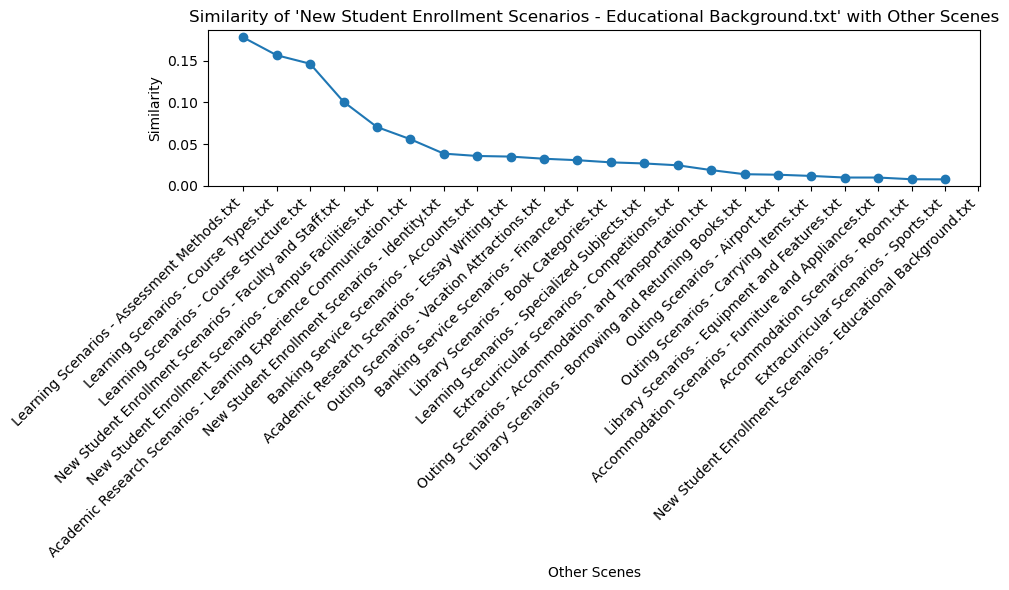

In [9]:
import matplotlib.pyplot as plt

# 选择一个场景
selected_scene = "New Student Enrollment Scenarios - Educational Background.txt"

# 获取选择场景的相似度数据，并按相似度从高到低排序
selected_scene_data = similarities_table[similarities_table["Scene"] == selected_scene].iloc[:, 1:].T
selected_scene_data.columns = ["Similarity"]
selected_scene_data = selected_scene_data.sort_values(by="Similarity", ascending=False)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(selected_scene_data.index, selected_scene_data["Similarity"], marker='o')
plt.title(f"Similarity of '{selected_scene}' with Other Scenes")
plt.xlabel("Other Scenes")
plt.ylabel("Similarity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# 显示折线图
plt.show()

In [16]:
# Assuming user_rating is the variable that holds the user's rating (1-5)
user_rating = 3  # You can replace this with the actual user rating

# Determine the scene index based on user rating
if user_rating >= 4:
    # Print the most similar scene
    most_similar_scene = selected_scene_data.index[0]
    print(f"For a rating of {user_rating}, the most similar scene is: {most_similar_scene}")
elif user_rating == 3:
    # Print the 12th most similar scene
    twelfth_similar_scene = selected_scene_data.index[11]
    print(f"For a rating of {user_rating}, the 12th most similar scene is: {twelfth_similar_scene}")
elif user_rating == 2:
    # Print the 17th most similar scene
    seventeenth_similar_scene = selected_scene_data.index[16]
    print(f"For a rating of {user_rating}, the 17th most similar scene is: {seventeenth_similar_scene}")
elif user_rating == 1:
    # Print the least similar scene
    least_similar_scene = selected_scene_data.index[-1]
    print(f"For a rating of {user_rating}, the least similar scene is: {least_similar_scene}")

# # Plotting code (unchanged from your original code)
# plt.figure(figsize=(10, 6))
# plt.plot(selected_scene_data.index, selected_scene_data["Similarity"], marker='o')
# plt.title(f"Similarity of '{selected_scene}' with Other Scenes")
# plt.xlabel("Other Scenes")
# plt.ylabel("Similarity")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

For a rating of 3, the 12th most similar scene is: Library Scenarios - Book Categories.txt
